In [1]:
import time
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go 
import plotly.express as px
from scipy.optimize import minimize, shgo
from scipy.optimize import differential_evolution

**Motivation:**
Consider the following 1-dimensional real function: $f(x)= 2\: x\: sin(x^3) - x\: cos(x^3/12) $. First, note that the limit $\lim_{x \to +\infty} f(x)$ does not exist, as $f$ oscillates frequently and may assume arbitrarily large positive or negative values. The lines $y=3x$ and $y=-3x$ are asymptotes of the function $f$. Also note that $f$, being a continuous function, attains its global minimum and maximum values on any bounded interval. We plot $f$ on the interval $x \in [-2\pi, 2\pi]$.


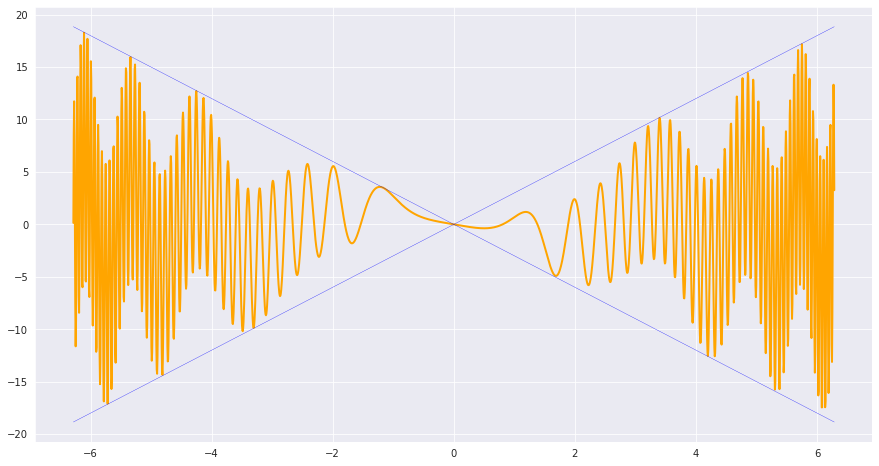

In [2]:
f1d = lambda x: 2*x*np.sin(x**3) - x*np.cos(x**3/12)
v1d = np.linspace(-2*np.pi,2*np.pi,2000)
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
sns.lineplot(x=v1d,y=f1d(v1d), linewidth = 2,color='orange');
sns.lineplot(x=v1d,y=3*v1d,color='blue',linewidth = 0.3);
sns.lineplot(x=v1d,y=-3*v1d,color='blue',linewidth = 0.3);

**Extension:** We may now generalize this function to: 
####$f(x)= \bigl( a\: sin(x^m/l) - b\: cos(x^m/k)\bigl) \:x^n$, 
where $a$, $b$, $l$, $k$ $\in \mathbb R_{\ne 0}$, and $m$ and $n$ $\in \mathbb{N}$. Then $f$ will have two asymptotes: $y = (\mid a \mid + \mid b \mid)x^n$ and $y = -(\mid a \mid + \mid b \mid)x^n$.


In [3]:
a=2
b=1
n=1
m=3
l=1
k=12

f1d_gen = lambda x: (a*np.sin((x**m)/l) - b*np.cos((x**m)/k))*(x**n)

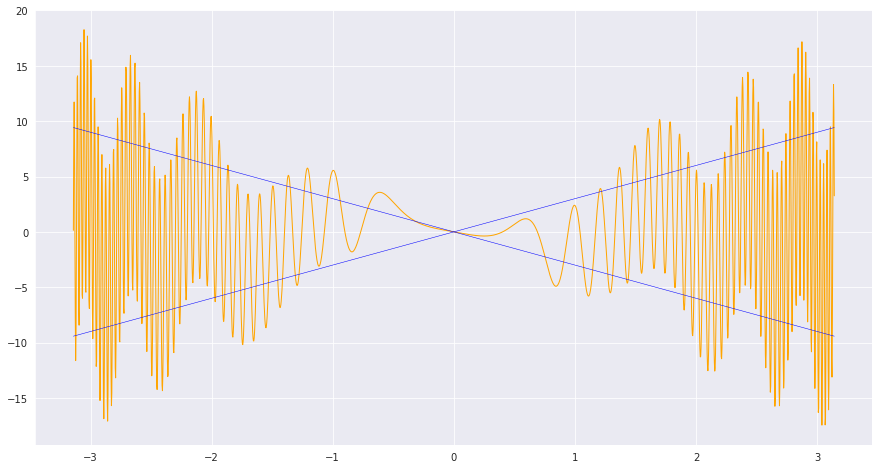

In [4]:
v1d_gen = np.linspace(-np.pi,np.pi,2000)
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
sns.lineplot(x=v1d_gen,y=f1d_gen(v1d), linewidth = 1,color='orange');
sns.lineplot(x=v1d_gen,y=(np.abs(a)+np.abs(b))*v1d_gen**n,color='blue',linewidth = 0.5);
sns.lineplot(x=v1d_gen,y=-(np.abs(a)+np.abs(b))*v1d_gen**n,color='blue',linewidth = 0.5);

**N-dimensional Extension:** For a given $X=(x_1,x_2,...,x_n) \in \mathbb{R}^n$, we define: 

####$f(X)= \Pi_{i=1}^n f_i(X)= \Pi_{i=1}^n f(x_i)=\Pi_{i=1}^n \bigl( a_i\: sin(x_i^m/l_i) - b_i\: cos(x_i^m/k_i)\bigl) \:x_i^n$,

where $a$, $b$, $l$, $k$ $\in \mathbb R_{\ne 0}$, and $m$ and $n$ $\in \mathbb{N}$.

We restrict out attention to the case where $x_i\in [-2\pi,2\pi]$ for all $i$.


**Example 1:** A one-dimensional case is the previously seen $f(x)= 2 x\: sin(x^3) - x\: cos(x^3/12) $, where $x\in [-2\pi,2\pi]$. 

**Example 2:** A two dimensional case may be defined as: 

$z= f(x,y)=  \biggl(2 \:x sin(x^3) - \:x cos(x^3/12) \biggl) \biggl(2 \:y sin(y^3) - \:y cos(y^3/12) \biggl)$ for $x\in [-2\pi,2\pi]$ and $y\in [-2\pi,2\pi]$.

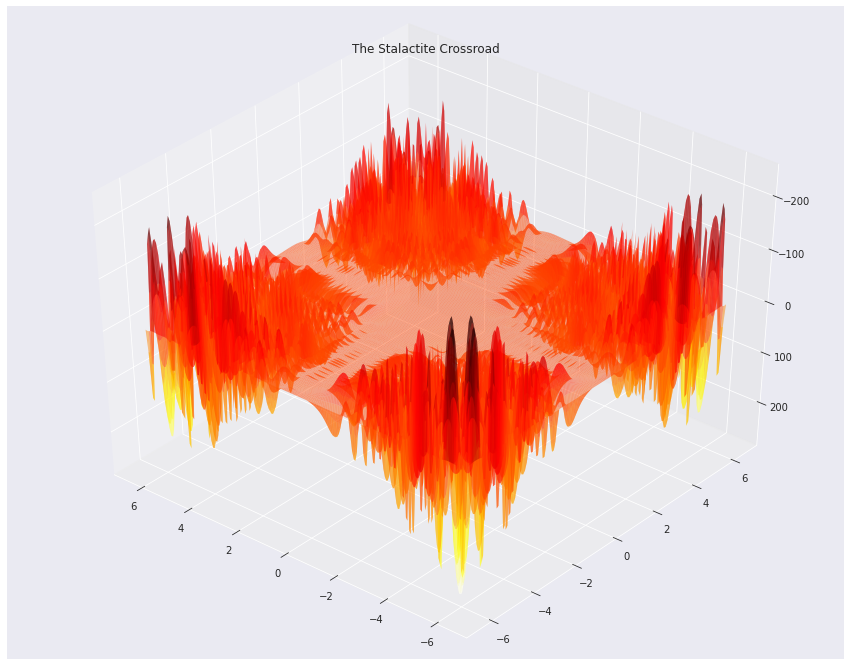

In [5]:
z = lambda x: x[0]*( 2*np.sin(x[0]**3) - np.cos(x[0]**3/12)) *x[1]*( 2*np.sin(x[1]**3) - np.cos(x[1]**3/12)) 
xlb=-2*np.pi
xub=2*np.pi

ylb=-2*np.pi
yub=2*np.pi

xdisc = 200
ydisc = 200

xv = np.outer(np.linspace(xlb,xub,xdisc),np.ones(xdisc))
#yv = np.outer(np.linspace(ylb,yub,ydisc),np.ones(ydisc)).T
yv = xv.copy().T

plt.figure(figsize=(15,12))
sns.set_style('darkgrid')
ax = plt.axes(projection='3d')
ax.plot_surface(xv, yv, z([xv,yv]), rstride=1, cstride=1, cmap='hot', edgecolor='none', alpha=0.5)
ax.view_init(-140, 50)
ax.set_title('The Stalactite Crossroad');

**Example 3:** Another two dimensional case may be defined as:

 $u= f(x,y)=  \biggl(\:x^3 sin(x^2/24) - \:x^3 cos(x^2) \biggl) \biggl(\:y^5 sin(y^5) + \:y^5 cos(y^5) \biggl)$ for $x\in [-2\pi,2\pi]$ and $y\in [-2\pi,2\pi]$.

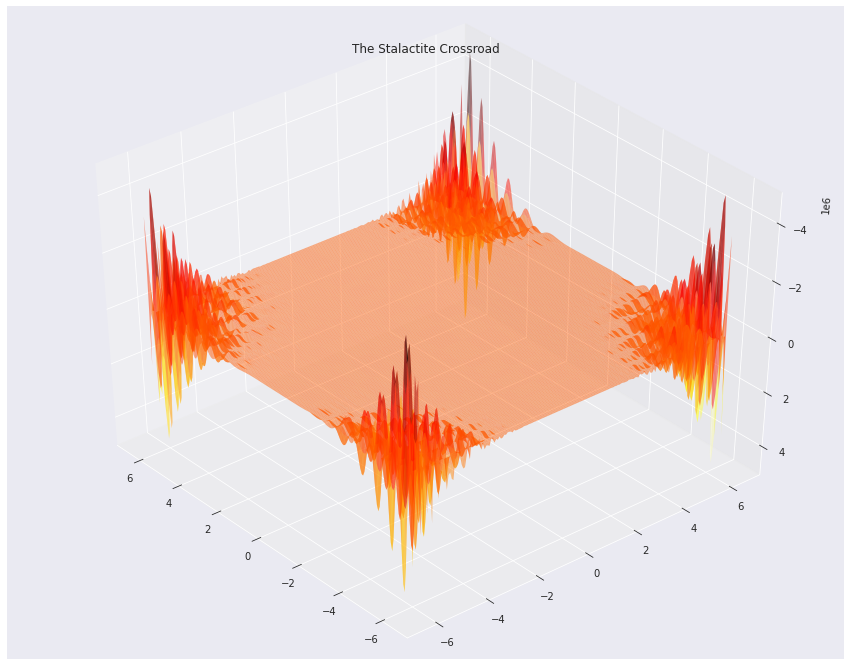

In [6]:
u = lambda x: x[0]**3*( np.sin(x[0]**2/24) - np.cos(x[0]**2)) *x[1]**5*( np.sin(x[1]**5) + np.cos(x[1]**5)) 
xlb=-2*np.pi
xub=2*np.pi

ylb=-2*np.pi
yub=2*np.pi

xdisc = 200
ydisc = 200

xv = np.outer(np.linspace(xlb,xub,xdisc),np.ones(xdisc))
#yv = np.outer(np.linspace(ylb,yub,ydisc),np.ones(ydisc)).T
yv = xv.copy().T

plt.figure(figsize=(15,12))
sns.set_style('darkgrid')
ax = plt.axes(projection='3d')
ax.plot_surface(xv, yv, u([xv,yv]), rstride=1, cstride=1, cmap='hot', edgecolor='none', alpha=0.5)
ax.view_init(-140, 40)
ax.set_title('The Stalactite Crossroad');

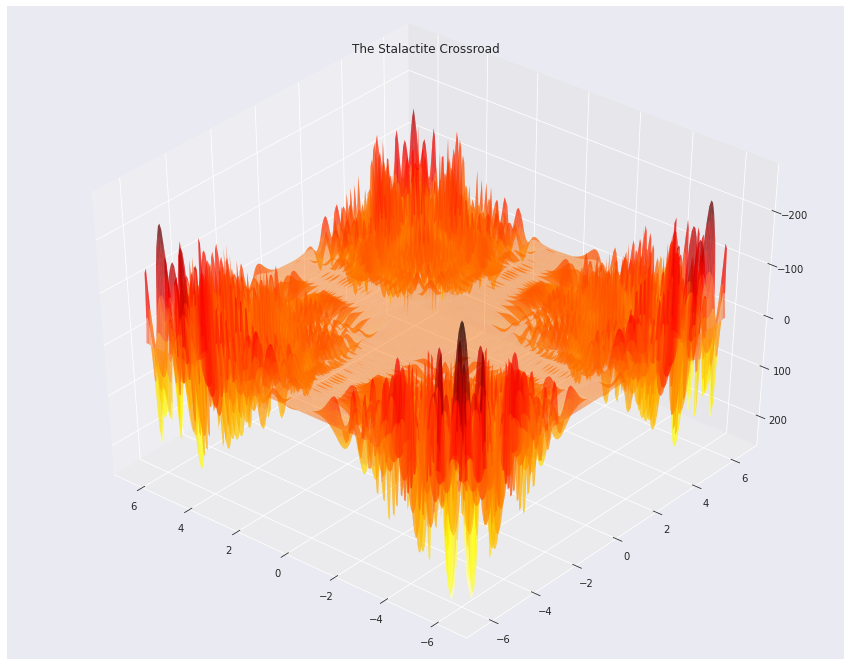

In [7]:
g = lambda x: - x[0]*( 2*np.sin(x[0]**3) - np.cos(x[0]**3/12)) *x[1]*( 2*np.sin(x[1]**3) - np.cos(x[1]**3/12)) 
xlb=-2*np.pi
xub=2*np.pi

ylb=-2*np.pi
yub=2*np.pi

xdisc = 200
ydisc = 200

xv = np.outer(np.linspace(xlb,xub,xdisc),np.ones(xdisc))
#yv = np.outer(np.linspace(ylb,yub,ydisc),np.ones(ydisc)).T
yv = xv.copy().T

plt.figure(figsize=(15,12))
sns.set_style('darkgrid')
ax = plt.axes(projection='3d')
ax.plot_surface(xv, yv, g([xv,yv]), rstride=1, cstride=1, cmap='hot', edgecolor='none', alpha=0.5)
ax.view_init(-140, 50)
ax.set_title('The Stalactite Crossroad');

This function has many local minima/maxima and can be used as a test function for single-objective optimization. Due to its very specific shape, we call this function $\textbf{"The Stalactite Crossroad"}$ function. Next, we are seeking to find the extrema of this function on its domain. 

In [8]:
print(f'xlb = {xlb:.5f}','&',f'xub = {xub:.4f}')
print(f'ylb = {ylb:.5f}','&',f'yub = {yub:.4f}')

print(f'Min(f) = {np.min(z([xv,yv])):.4f}')

xlb = -6.28319 & xub = 6.2832
ylb = -6.28319 & yub = 6.2832
Min(f) = -249.0703


In [9]:
#Using Differential Evolution global search Algorithm
#%%time
x0 = (-6.28,-6.28)
bnds = ((xlb, xub),(ylb, yub))
de = differential_evolution(z,x0=x0, bounds=bnds, maxiter=1000, tol=1e-15, seed=123)
#print(f'(x = {de.x[0]:.4f}',',',f'y = {de.x[1]:.4f})','&',f'Min(f)_de = {de.fun:.4f}')
print(f'Minimum value of z {de.fun:.4f}','was found for pair', f'(x={de.x[0]:.4f}',',',f'y={de.x[1]:.4f}).')

Minimum value of z -332.2155 was found for pair (x=6.0789 , y=-6.1070).


In [10]:
#Using SHGO Algorithm “simplicial homology global optimization”. 
#%%time
x0 = (de.x[0],de.x[1])
#bnds = [(xlb, xub),(ylb, yub)]
bnds = ((xlb, xub),(ylb, yub))
shgo_res = shgo(z, bounds=bnds, iters=10)
print(f'Minimum value of z {shgo_res.fun:.4f}','was found for pair', f'(x={shgo_res.x[0]:.4f}',',',f'y={shgo_res.x[1]:.4f}).')

Minimum value of z -332.2155 was found for pair (x=-6.1070 , y=6.0789).


In [11]:
#Using Nelder Mead local search Algorithm
%time
#x0 = (de.x[0],de.x[1])
x0 = (de.x[0],de.x[1])
#bnds = [(xlb, xub),(ylb, yub)]
bnds = ((xlb, xub),(ylb, yub))
res = minimize(z, x0, method='Nelder-Mead', tol=1e-9, bounds=bnds, options={'maxiter':1e11})
print(f'Minimum value of z {res.fun:.4f}','was found for pair', f'(x={res.x[0]:.4f}',',',f'y={res.x[1]:.4f}).')

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs
Minimum value of z -332.2155 was found for pair (x=6.0789 , y=-6.1070).


Now let's find the minimum of h:

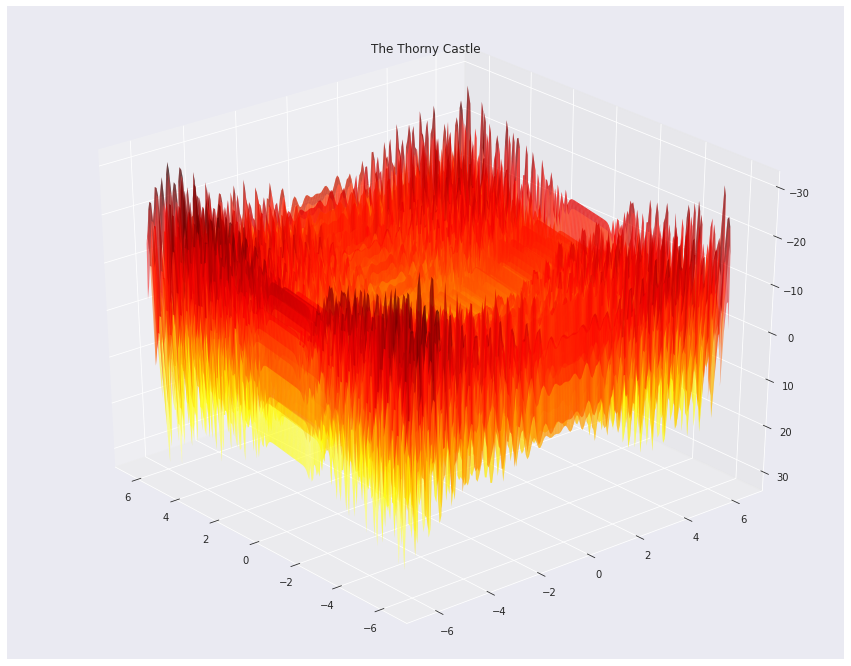

In [12]:
h = lambda x: x[0]*( 2*np.sin(x[0]**13) - np.cos(x[0]**11/13)) + x[1]*( 2*np.sin(x[1]*13) - np.cos(x[1]**13/12)) 
xlb=-2*np.pi
xub=2*np.pi

ylb=-2*np.pi
yub=2*np.pi

xdisc = 200
ydisc = 200

xv = np.outer(np.linspace(xlb,xub,xdisc),np.ones(xdisc))
#yv = np.outer(np.linspace(ylb,yub,ydisc),np.ones(ydisc)).T
yv = xv.copy().T

plt.figure(figsize=(15,12))
sns.set_style('darkgrid')
ax = plt.axes(projection='3d')
ax.plot_surface(xv, yv, h([xv,yv]), rstride=1, cstride=1, cmap='hot', edgecolor='none', alpha=0.5)
ax.view_init(-150, 40)
ax.set_title('The Thorny Castle');

In [13]:
#Using Differential Evolution global search Algorithm
%time
x0 = (0,0)
bnds = ((xlb, xub),(ylb, yub))
de = differential_evolution(h,x0=x0, bounds=bnds, maxiter=1000, tol=1e-15, seed=123)
#print(f'(x = {de.x[0]:.4f}',',',f'y = {de.x[1]:.4f})','&',f'Min(f)_de = {de.fun:.4f}')
print(f'Minimum value of h {de.fun:.4f}','was found for pair', f'(x={de.x[0]:.4f}',',',f'y={de.x[1]:.4f}).')

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.58 µs
Minimum value of h -37.2704 was found for pair (x=6.2714 , y=6.1624).


In [17]:
#Using SHGO Algorithm “simplicial homology global optimization”. 
%time
x0 = (de.x[0],de.x[1])
#bnds = [(xlb, xub),(ylb, yub)]
bnds = ((xlb, xub),(ylb, yub))
shgo_res = shgo(h, bounds=bnds, iters=8)
print(f'Minimum value of h {shgo_res.fun:.4f}','was found for pair', f'(x={shgo_res.x[0]:.4f}',',',f'y={shgo_res.x[1]:.4f}).')

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs
Minimum value of h -28.7538 was found for pair (x=-5.3014 , y=-5.6941).


In [16]:
#Using Nelder Mead local search Algorithm
%time
#x0 = (de.x[0],de.x[1])
x0 = (shgo_res.x[0],shgo_res.x[1])
#bnds = [(xlb, xub),(ylb, yub)]
bnds = ((xlb, xub),(ylb, yub))
res_max = minimize(h, x0, method='Nelder-Mead', tol=1e-10, bounds=bnds, options={'maxiter':1e10})
print(f'Mim value of h {res_max.fun:.4f}','was found for pair', f'(x={res_max.x[0]:.4f}',',',f'y={res_max.x[1]:.4f}).')

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs
Mim value of h -29.0623 was found for pair (x=-5.5326 , y=4.7237).
